# Model comparation

Finally after months of processing data, building and debuging the models are workin. 

Now we will compare them with different metrics. 

The nomenclature of the models is the following: target used for training (CDL or NASS) and split of train and test (spatial or temporal).  
We will be comparing the models:

- CDL spatial
- CDL temporal
- NASS temporal
- NASS spatial


In [44]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image
import pandas as pd
#libraries 
import numpy as np
import time
import sys, os, imp
import glob
from osgeo import gdal
from PIL import Image
import matplotlib.pyplot as plt

import seaborn as sns

import time



First lets take a look at the traininig loss during trainig:

In [41]:
def read(file):
    b = []
    with open(file, 'r') as fp:
            for line in fp:
                x = line[:-1]
                b.append(float(x))
    return b

In [42]:
l_CDLs = read("nice_model_results/list_loss_CDL_spatial.txt")
l_CDLt = read("nice_model_results/list_loss_CDL_temporal.txt")
l_NASSs = read("nice_model_results/list_loss_NASS_spatial.txt")
l_NASSt = read("nice_model_results/list_loss_NASS_temporal.txt")

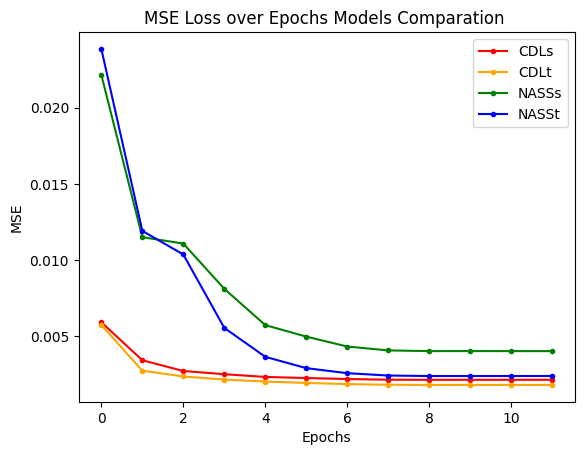

In [35]:
xax = list(range(len(l_CDLs)))
plt.plot(xax[:12], l_CDLs[:12], label="CDLs", marker='.',color='r')
plt.plot(xax[:12], l_CDLt[:12], label="CDLt", marker='.',color='orange')
plt.plot(xax[:12], l_NASSs[:12], label="NASSs", marker='.', color='g')
plt.plot(xax[:12], l_NASSt[:12], label="NASSt", marker='.', color='b')
plt.title("MSE Loss over Epochs Models Comparation ")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

Now lets make predictions with the models trained in train and test set:

In [43]:
#train set files
At = aCDL.read_lits('lists_data/A_temp_0.txt', 'lists_data/A_temp_1.txt', 'lists_data/A_temp_2.txt')
A_temporal = At[0]
As = aCDL.read_lits('lists_data/list_A_0.txt', 'lists_data/list_A_1.txt', 'lists_data/list_A_2.txt')
A_spatial = As[0]
#test set files
Bt = aCDL.read_lits('lists_data/B_temp_0.txt', 'lists_data/B_temp_1.txt', 'lists_data/B_temp_2.txt')
B_temporal = Bt[0]
Bs = aCDL.read_lits('lists_data/list_B_0.txt', 'lists_data/list_B_1.txt', 'lists_data/list_B_2.txt')
B_spatial = Bs[0]

NameError: name 'aCDL' is not defined

# RMSE training performance

## Comparation to CDL:

In [51]:
mse_CDLs_train = mm.mse_eval_CDL("Predictions/Train_set/CDL_spatial")
mse_NASSs_train = mm.mse_eval_CDL("Predictions/Train_set/NASS_spatial")
mse_CDLt_train = mm.mse_eval_CDL("Predictions/Train_set/CDL_temporal")
mse_NASSt_train = mm.mse_eval_CDL("Predictions/Train_set/NASS_temporal")

all filles: 2121
all filles: 2121
all filles: 2086
all filles: 2086


In [52]:
rmse_CDLs_train = mm.rmse(mse_CDLs_train)
rmse_NASSs_train = mm.rmse(mse_NASSs_train)
rmse_CDLt_train = mm.rmse(mse_CDLt_train)
rmse_NASSt_train = mm.rmse(mse_NASSt_train)

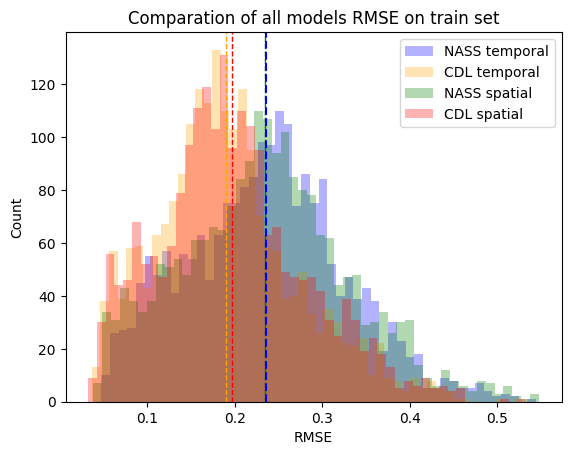

NASS temp mean:    0.23550365199013276 NASS temp std:    0.09098832752926005
NASS spatial mean: 0.23473400073934345 NASS spatial std: 0.09622640215633048
CDL temp mean:     0.1901563897152553 CDL temp std:     0.08158672906794932
CDL spatial mean:  0.19663940984752773 CDL spatial std:  0.0847024363786107


In [113]:
plt.hist(rmse_NASSt_train, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rmse_CDLt_train, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rmse_NASSs_train , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rmse_CDLs_train, bins=50, alpha= 0.3, color='r', label="CDL spatial")
plt.title("Comparation of all models RMSE on train set")
plt.axvline(np.mean(rmse_NASSs_train), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_NASSt_train), color='b', linestyle='dashed', linewidth=1.5)
plt.axvline(np.mean(rmse_CDLt_train), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLs_train), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temp mean:   ", np.mean(rmse_NASSt_train), "NASS temp std:   ", np.std(rmse_NASSt_train)) 
print("NASS spatial mean:", np.mean(rmse_NASSs_train ), "NASS spatial std:", np.std(rmse_NASSs_train)) 
print("CDL temp mean:    ", np.mean(rmse_CDLt_train ), "CDL temp std:    ", np.std(rmse_CDLt_train)) 
print("CDL spatial mean: ", np.mean(rmse_CDLs_train ), "CDL spatial std: ", np.std(rmse_CDLs_train)) 

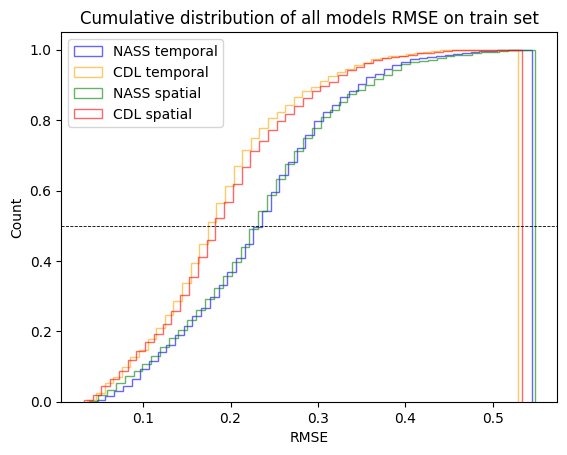

NASS temporal percentiles 25,50,75,100: [0.16836262 0.23740677 0.29289073 0.54448002]
NASS spatial percentiles 25,50,75,100:  [0.16806297 0.23365484 0.29327343 0.54809703]
CDL temp percentiles 25,50,75,100:      [0.13578349 0.18215487 0.23313853 0.52841256]
CDL spatial percentiles 25,50,75,100:   [0.14063473 0.18905716 0.24473868 0.53362646]


In [116]:
plt.hist(rmse_NASSt_train, bins=50, alpha= 0.6, color='b', label="NASS temporal", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLt_train, bins=50, alpha= 0.6, color='orange', label="CDL temporal", cumulative=True, histtype='step', density=True )
plt.hist(rmse_NASSs_train , bins=50, alpha= 0.6, color='g', label="NASS spatial", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLs_train, bins=50, alpha= 0.6, color='r', label="CDL spatial", cumulative=True, histtype='step', density=True)
plt.title("Cumulative distribution of all models RMSE on train set")
plt.axhline(y=0.5, color='black', linestyle='dashed', linewidth=0.6)
plt.legend(loc='upper left')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temporal percentiles 25,50,75,100:", np.percentile(rmse_NASSt_train, [25, 50, 75, 100]))
print("NASS spatial percentiles 25,50,75,100: ", np.percentile(rmse_NASSs_train, [25, 50, 75, 100])) 
print("CDL temp percentiles 25,50,75,100:     ", np.percentile(rmse_CDLt_train, [25, 50, 75, 100])) 
print("CDL spatial percentiles 25,50,75,100:  ", np.percentile(rmse_CDLs_train, [25, 50, 75, 100])) 

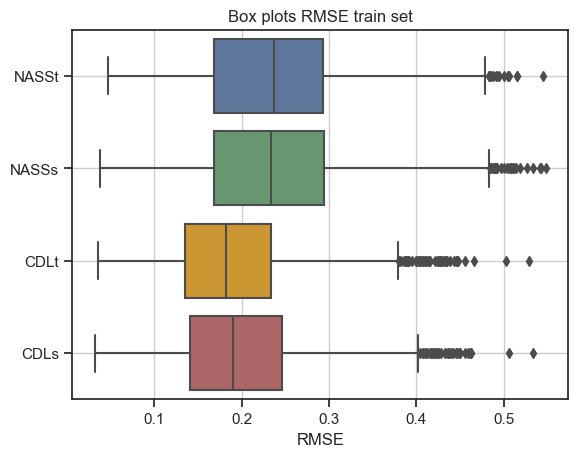

In [164]:
df = pd.DataFrame(list(zip(rmse_NASSt_train,rmse_NASSs_train, rmse_CDLt_train, rmse_CDLs_train)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots RMSE train set")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# RMSE test performance

## Comparation to CDL:

In [56]:
mse_CDLs_test = mm.mse_eval_CDL("Predictions/Test_set/CDL_spatial")
mse_NASSs_test = mm.mse_eval_CDL("Predictions/Test_set/NASS_spatial")
mse_CDLt_test = mm.mse_eval_CDL("Predictions/Test_set/CDL_temporal")
mse_NASSt_test = mm.mse_eval_CDL("Predictions/Test_set/NASS_temporal")

all filles: 512
all filles: 512
all filles: 547
all filles: 547


In [57]:
rmse_CDLs_test = mm.rmse(mse_CDLs_test)
rmse_NASSs_test = mm.rmse(mse_NASSs_test)
rmse_CDLt_test = mm.rmse(mse_CDLt_test)
rmse_NASSt_test = mm.rmse(mse_NASSt_test)

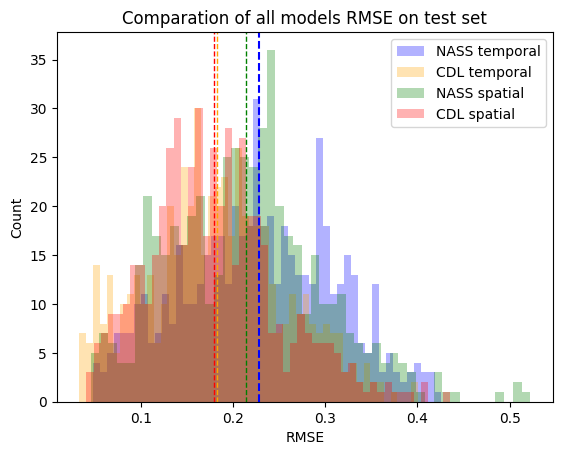

NASS temp mean:    0.2279764694161098 NASS temp std:    0.08265855056703966
NASS spatial mean: 0.21381744984333995 NASS spatial std: 0.08379750833801729
CDL temp mean:     0.18203040892696448 CDL temp std:     0.07495000237152828
CDL spatial mean:  0.17932579229394552 CDL spatial std:  0.07029761679831655


In [114]:
plt.hist(rmse_NASSt_test, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rmse_CDLt_test, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rmse_NASSs_test , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rmse_CDLs_test, bins=50, alpha= 0.3, color='r', label="CDL spatial")
plt.title("Comparation of all models RMSE on test set")
plt.axvline(np.mean(rmse_NASSs_test), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_NASSt_test), color='b', linestyle='dashed', linewidth=1.5)
plt.axvline(np.mean(rmse_CDLt_test), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLs_test), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temp mean:   ", np.mean(rmse_NASSt_test), "NASS temp std:   ", np.std(rmse_NASSt_test)) 
print("NASS spatial mean:", np.mean(rmse_NASSs_test ), "NASS spatial std:", np.std(rmse_NASSs_test)) 
print("CDL temp mean:    ", np.mean(rmse_CDLt_test ), "CDL temp std:    ", np.std(rmse_CDLt_test)) 
print("CDL spatial mean: ", np.mean(rmse_CDLs_test ), "CDL spatial std: ", np.std(rmse_CDLs_test)) 

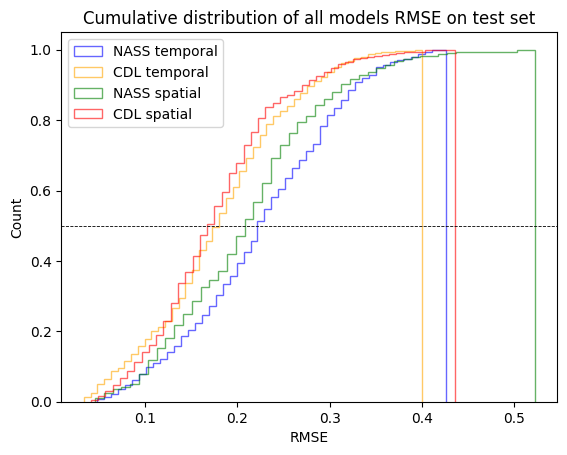

NASS temporal percentiles 25,50,75,100: [0.17051186 0.22684382 0.29206782 0.42609376]
NASS spatial percentiles 25,50,75,100:  [0.15179172 0.21368018 0.26045959 0.52252224]
CDL temp percentiles 25,50,75,100:      [0.13300628 0.18096213 0.23064886 0.40023404]
CDL spatial percentiles 25,50,75,100:   [0.13136341 0.17279144 0.21880941 0.43548592]


In [115]:
plt.hist(rmse_NASSt_test, bins=50, alpha= 0.6, color='b', label="NASS temporal", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLt_test, bins=50, alpha= 0.6, color='orange', label="CDL temporal", cumulative=True, histtype='step', density=True )
plt.hist(rmse_NASSs_test , bins=50, alpha= 0.6, color='g', label="NASS spatial", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLs_test, bins=50, alpha= 0.6, color='r', label="CDL spatial", cumulative=True, histtype='step', density=True)
plt.title("Cumulative distribution of all models RMSE on test set")
plt.axhline(y=0.5, color='black', linestyle='dashed', linewidth=0.6)
plt.legend(loc='upper left')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temporal percentiles 25,50,75,100:", np.percentile(rmse_NASSt_test, [25, 50, 75, 100]))
print("NASS spatial percentiles 25,50,75,100: ", np.percentile(rmse_NASSs_test, [25, 50, 75, 100])) 
print("CDL temp percentiles 25,50,75,100:     ", np.percentile(rmse_CDLt_test, [25, 50, 75, 100])) 
print("CDL spatial percentiles 25,50,75,100:  ", np.percentile(rmse_CDLs_test, [25, 50, 75, 100])) 

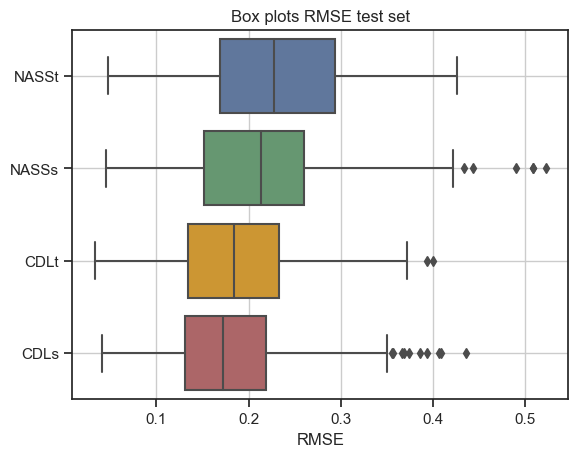

In [163]:
df = pd.DataFrame(list(zip(rmse_NASSt_test,rmse_NASSs_test, rmse_CDLt_test, rmse_CDLs_test)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots RMSE test set")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# Comparation to NASS target train set

In [37]:
MSE_nt_CDLs = mm.mse_eval_NASS("Predictions/Train_set/CDL_spatial" , As)
MSE_nt_CDLt = mm.mse_eval_NASS("Predictions/Train_set/CDL_temporal" , At)
MSE_nt_NASSs = mm.mse_eval_NASS("Predictions/Train_set/NASS_spatial" , As)
MSE_nt_NASSt = mm.mse_eval_NASS("Predictions/Train_set/NASS_temporal" , At)

NameError: name 'As' is not defined

In [8]:
rmse_CDLs_nt = mm.rmse_in(MSE_nt_CDLs)
rmse_NASSs_nt = mm.rmse_in(MSE_nt_NASSs)
rmse_CDLt_nt = mm.rmse_in(MSE_nt_CDLt)
rmse_NASSt_nt = mm.rmse_in(MSE_nt_NASSt)

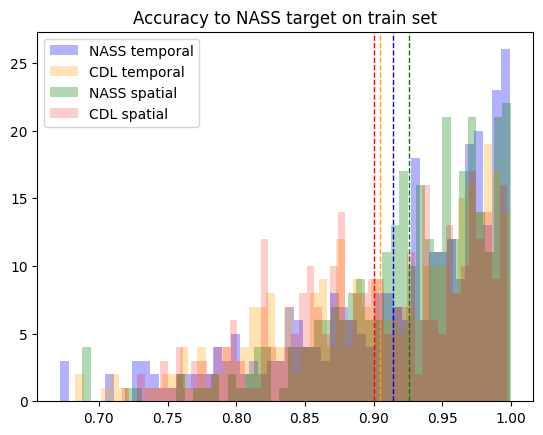

NASS temp mean:    0.9141044669593723 NASS temp std:    0.07640750577732976
NASS spatial mean: 0.9257478812834176 NASS spatial std: 0.06115654419200693
CDL temp mean:     0.9043886099743583 CDL temp std:     0.07439591588905313
CDL spatial mean:  0.9002298541420902 CDL spatial std:  0.06908312543274789


In [36]:
plt.hist(rmse_NASSt_nt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rmse_CDLt_nt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rmse_NASSs_nt , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rmse_CDLs_nt, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Accuracy to NASS target on train set")
plt.axvline(np.mean(rmse_NASSs_nt), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_NASSt_nt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLt_nt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLs_nt), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(rmse_NASSt_nt), "NASS temp std:   ", np.std(rmse_NASSt_nt)) 
print("NASS spatial mean:", np.mean(rmse_NASSs_nt ), "NASS spatial std:", np.std(rmse_NASSs_nt)) 
print("CDL temp mean:    ", np.mean(rmse_CDLt_nt ), "CDL temp std:    ", np.std(rmse_CDLt_nt)) 
print("CDL spatial mean: ", np.mean(rmse_CDLs_nt ), "CDL spatial std: ", np.std(rmse_CDLs_nt)) 

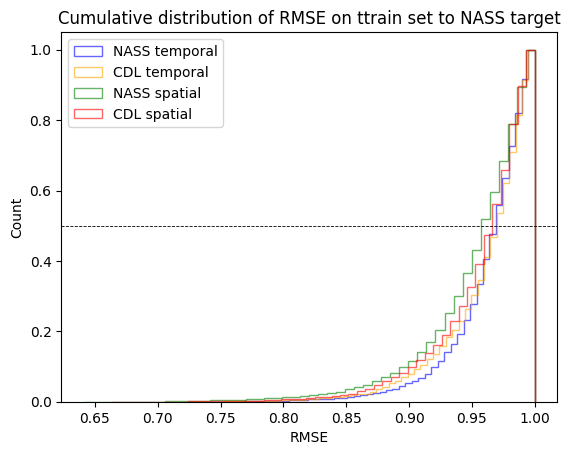

NASS temporal percentiles 25,50,75,100: [0.95088062 0.970341   0.98589196 0.99997156]
NASS spatial percentiles 25,50,75,100:  [0.93496726 0.96255188 0.98288937 0.99994417]
CDL temp percentiles 25,50,75,100:      [0.94767009 0.97226389 0.98688565 0.99998355]
CDL spatial percentiles 25,50,75,100:   [0.94359262 0.96828941 0.9844046  0.99999148]


In [13]:
plt.hist(rmse_NASSt_nt, bins=50, alpha= 0.6, color='b', label="NASS temporal", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLt_nt, bins=50, alpha= 0.6, color='orange', label="CDL temporal", cumulative=True, histtype='step', density=True )
plt.hist(rmse_NASSs_nt , bins=50, alpha= 0.6, color='g', label="NASS spatial", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLs_nt, bins=50, alpha= 0.6, color='r', label="CDL spatial", cumulative=True, histtype='step', density=True)
plt.title("Cumulative distribution of RMSE on ttrain set to NASS target")
plt.axhline(y=0.5, color='black', linestyle='dashed', linewidth=0.6)
plt.legend(loc='upper left')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temporal percentiles 25,50,75,100:", np.percentile(rmse_NASSt_nt, [25, 50, 75, 100]))
print("NASS spatial percentiles 25,50,75,100: ", np.percentile(rmse_NASSs_nt, [25, 50, 75, 100])) 
print("CDL temp percentiles 25,50,75,100:     ", np.percentile(rmse_CDLt_nt, [25, 50, 75, 100])) 
print("CDL spatial percentiles 25,50,75,100:  ", np.percentile(rmse_CDLs_nt, [25, 50, 75, 100])) 

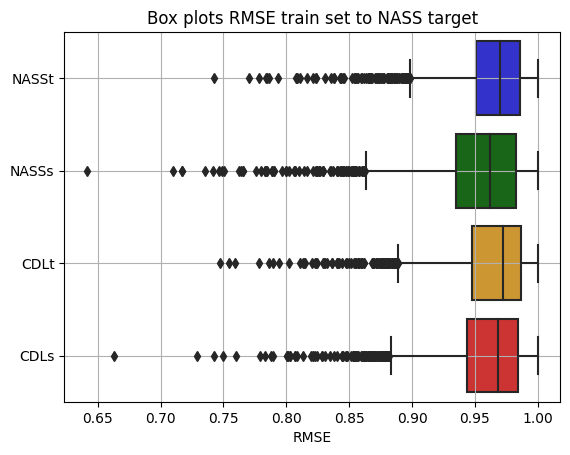

In [17]:
df = pd.DataFrame(list(zip(rmse_NASSt_nt,rmse_NASSs_nt, rmse_CDLt_nt, rmse_CDLs_nt)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots RMSE train set to NASS target")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# Comparation to NASS target test set

In [91]:
MSE_nt_CDLs = mm.mse_eval_NASS("Predictions/Test_set/CDL_spatial" , Bs)
MSE_nt_CDLt = mm.mse_eval_NASS("Predictions/Test_set/CDL_temporal" , Bt)
MSE_nt_NASSs = mm.mse_eval_NASS("Predictions/Test_set/NASS_spatial" , Bs)
MSE_nt_NASSt = mm.mse_eval_NASS("Predictions/Test_set/NASS_temporal" , Bt)

all filles: 512
all filles: 547
all filles: 512
all filles: 547


In [92]:
rmse_CDLs_nt = mm.rmse_in(MSE_nt_CDLs)
rmse_NASSs_nt = mm.rmse_in(MSE_nt_NASSs)
rmse_CDLt_nt = mm.rmse_in(MSE_nt_CDLt)
rmse_NASSt_nt = mm.rmse_in(MSE_nt_NASSt)

In [97]:
len(rmse_NASSt_nt)

547

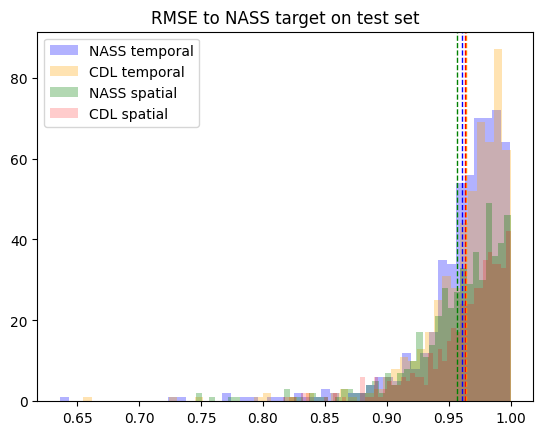

NASS temp mean:    0.960912341073461 NASS temp std:    0.039847769128326715
NASS spatial mean: 0.9568572272457454 NASS spatial std: 0.03926670171713213
CDL temp mean:     0.9634641759406294 CDL temp std:     0.03642222056357337
CDL spatial mean:  0.9631505376657664 CDL spatial std:  0.033064653910858444


In [98]:
plt.hist(rmse_NASSt_nt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rmse_CDLt_nt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rmse_NASSs_nt , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rmse_CDLs_nt, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("RMSE to NASS target on test set")
plt.axvline(np.mean(rmse_NASSs_nt), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_NASSt_nt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLt_nt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLs_nt), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(rmse_NASSt_nt), "NASS temp std:   ", np.std(rmse_NASSt_nt)) 
print("NASS spatial mean:", np.mean(rmse_NASSs_nt ), "NASS spatial std:", np.std(rmse_NASSs_nt)) 
print("CDL temp mean:    ", np.mean(rmse_CDLt_nt ), "CDL temp std:    ", np.std(rmse_CDLt_nt)) 
print("CDL spatial mean: ", np.mean(rmse_CDLs_nt ), "CDL spatial std: ", np.std(rmse_CDLs_nt)) 

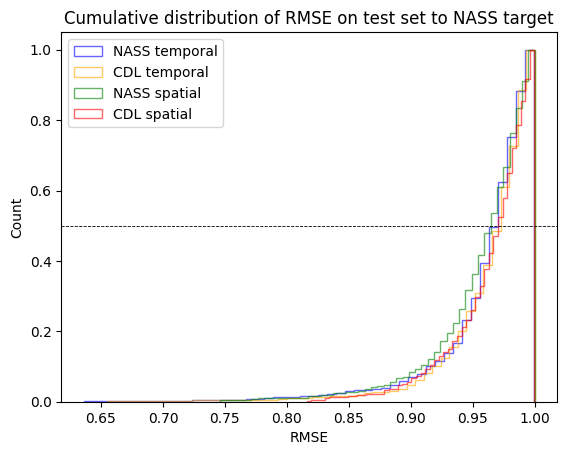

NASS temporal percentiles 25,50,75,100: [0.95013744 0.97087895 0.98494866 0.99954627]
NASS spatial percentiles 25,50,75,100:  [0.94205464 0.96583872 0.98348703 0.99991631]
CDL temp percentiles 25,50,75,100:      [0.95041502 0.97360219 0.98702849 0.99992623]
CDL spatial percentiles 25,50,75,100:   [0.9502916  0.97198677 0.98649534 0.99969917]


In [99]:
plt.hist(rmse_NASSt_nt, bins=50, alpha= 0.6, color='b', label="NASS temporal", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLt_nt, bins=50, alpha= 0.6, color='orange', label="CDL temporal", cumulative=True, histtype='step', density=True )
plt.hist(rmse_NASSs_nt , bins=50, alpha= 0.6, color='g', label="NASS spatial", cumulative=True, histtype='step', density=True)
plt.hist(rmse_CDLs_nt, bins=50, alpha= 0.6, color='r', label="CDL spatial", cumulative=True, histtype='step', density=True)
plt.title("Cumulative distribution of RMSE on test set to NASS target")
plt.axhline(y=0.5, color='black', linestyle='dashed', linewidth=0.6)
plt.legend(loc='upper left')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temporal percentiles 25,50,75,100:", np.percentile(rmse_NASSt_nt, [25, 50, 75, 100]))
print("NASS spatial percentiles 25,50,75,100: ", np.percentile(rmse_NASSs_nt, [25, 50, 75, 100])) 
print("CDL temp percentiles 25,50,75,100:     ", np.percentile(rmse_CDLt_nt, [25, 50, 75, 100])) 
print("CDL spatial percentiles 25,50,75,100:  ", np.percentile(rmse_CDLs_nt, [25, 50, 75, 100])) 

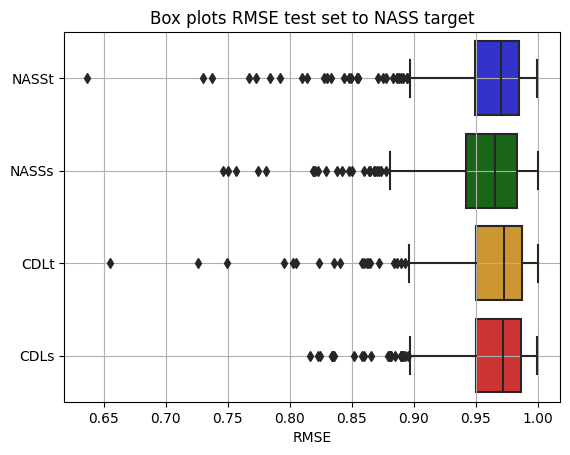

In [100]:
df = pd.DataFrame(list(zip(rmse_NASSt_nt,rmse_NASSs_nt, rmse_CDLt_nt, rmse_CDLs_nt)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots RMSE test set to NASS target")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# 0 or 1 Acurracy train set 

aNASSs = mm.acurracy_eval("Predictions/train_set/NASS_spatial", 0.5)
aCDLs = mm.acurracy_eval("Predictions/train_set/CDL_spatial", 0.5)
aNASSt = mm.acurracy_eval("Predictions/train_set/NASS_temporal", 0.5)
aCDLt = mm.acurracy_eval("Predictions/train_set/CDL_temporal", 0.5)

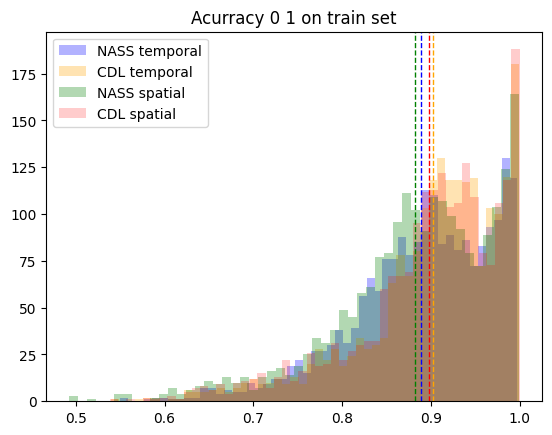

NASS temp mean:    0.8893383210217833 NASS temp std:    0.07861298562925663
NASS spatial mean: 0.8823646517499896 NASS spatial std: 0.08899322647558501
CDL temp mean:     0.9020112474524473 CDL temp std:     0.07891142032012667
CDL spatial mean:  0.8976350123484977 CDL spatial std:  0.08265657592746922


In [32]:
plt.hist(aNASSt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(aCDLt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(aNASSs , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(aCDLs, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Acurracy 0 1 on train set")
plt.axvline(np.mean(aNASSs), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aNASSt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aCDLt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aCDLs), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(aNASSt), "NASS temp std:   ", np.std(aNASSt)) 
print("NASS spatial mean:", np.mean(aNASSs ), "NASS spatial std:", np.std(aNASSs)) 
print("CDL temp mean:    ", np.mean(aCDLt ), "CDL temp std:    ", np.std(aCDLt)) 
print("CDL spatial mean: ", np.mean(aCDLs ), "CDL spatial std: ", np.std(aCDLs)) 

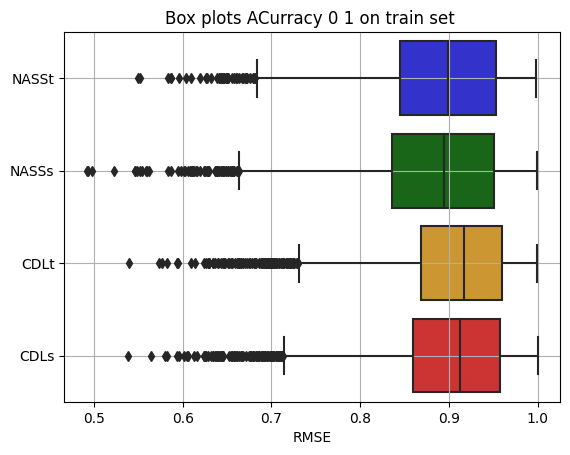

In [34]:
df = pd.DataFrame(list(zip(aNASSt,aNASSs, aCDLt, aCDLs)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots ACurracy 0 1 on train set ")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# 0 or 1 Acurracy test set 

In [40]:
#aNASSs = mm.acurracy_eval("Predictions/test_set/NASS_spatial", 0.5)

aCDLs = mm.acurracy_eval("Predictions/test_set/CDL_spatial", 0.5)
aNASSt = mm.acurracy_eval("Predictions/test_set/NASS_temporal", 0.5)
aCDLt = mm.acurracy_eval("Predictions/test_set/CDL_temporal", 0.5)
aNASSs = mm.acurracy_eval("Predictions/test_set/NASS_spatial", 0.5)

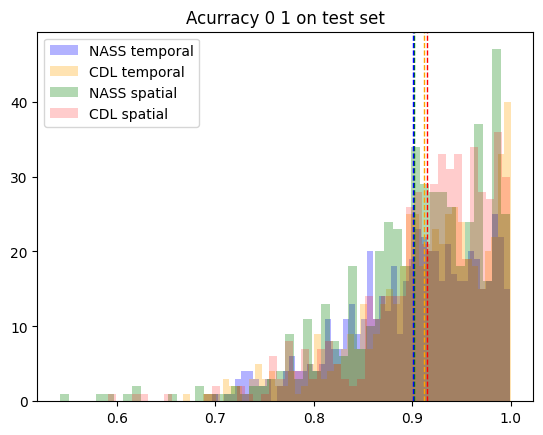

NASS temp mean:    0.9010054436476466 NASS temp std:    0.06674770559236964
NASS spatial mean: 0.9021789506163063 NASS spatial std: 0.07472772331510977
CDL temp mean:     0.9123570661847915 CDL temp std:     0.0676551481579501
CDL spatial mean:  0.9152783320601188 CDL spatial std:  0.06749940424869029


In [48]:
plt.hist(aNASSt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(aCDLt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(aNASSs , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(aCDLs, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Acurracy 0 1 on test set")
plt.axvline(np.mean(aNASSs), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aNASSt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aCDLt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aCDLs), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(aNASSt), "NASS temp std:   ", np.std(aNASSt)) 
print("NASS spatial mean:", np.mean(aNASSs ), "NASS spatial std:", np.std(aNASSs)) 
print("CDL temp mean:    ", np.mean(aCDLt ), "CDL temp std:    ", np.std(aCDLt)) 
print("CDL spatial mean: ", np.mean(aCDLs ), "CDL spatial std: ", np.std(aCDLs)) 

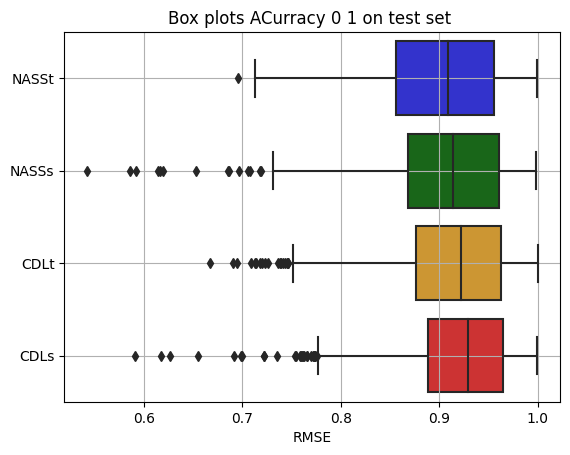

In [49]:
df = pd.DataFrame(list(zip(aNASSt,aNASSs, aCDLt, aCDLs)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots ACurracy 0 1 on test set ")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# Precision, Recall, F1score Train Set

In [50]:
#acurracy_list, precision_list, recall_list, f1_list
aCDLs, pCDLs, rCDLs, f1CDLs = mm.f1_score("Predictions/train_set/CDL_spatial", 0.5)
aNASST, pNASSt, rNASSt, f1NASSt = mm.f1_score("Predictions/train_set/NASS_temporal", 0.5)
aCDLt, pCDLt, rCDLt, f1CDLt = mm.f1_score("Predictions/train_set/CDL_temporal", 0.5)
aNASSs, pNASSs, rNASSs, f1NASSs = mm.f1_score("Predictions/train_set/NASS_spatial", 0.5)

all filles: 2121


pyLib\modis_lib\metrics_models.py:191: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp/(tp+fp)
pyLib\modis_lib\metrics_models.py:192: RuntimeWarning: invalid value encountered in double_scalars
  recall = tp/(tp+fn)


all filles: 2086
all filles: 2086
all filles: 2121


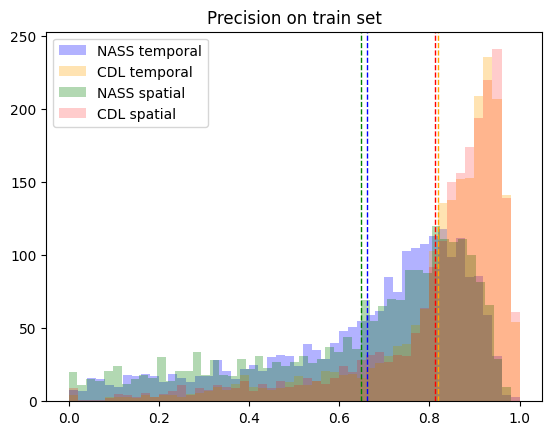

NASS temp mean:    0.6616447221218896 NASS temp std:    0.22917156094846666
NASS spatial mean: 0.6472913042253939 NASS spatial std: 0.24893730410997095
CDL temp mean:     0.8200293069426761 CDL temp std:     0.17055067847149585
CDL spatial mean:  0.813354072934093 CDL spatial std:  0.1854860838069407


In [57]:
plt.hist(pNASSt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(pCDLt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(pNASSs , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(pCDLs, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Precision on train set")
plt.axvline(np.mean(pNASSs), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(pNASSt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(pCDLt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(pCDLs), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(pNASSt), "NASS temp std:   ", np.std(pNASSt)) 
print("NASS spatial mean:", np.mean(pNASSs ), "NASS spatial std:", np.std(pNASSs)) 
print("CDL temp mean:    ", np.nanmean(pCDLt ), "CDL temp std:    ", np.nanstd(pCDLt)) 
print("CDL spatial mean: ", np.nanmean(pCDLs ), "CDL spatial std: ", np.nanstd(pCDLs)) 

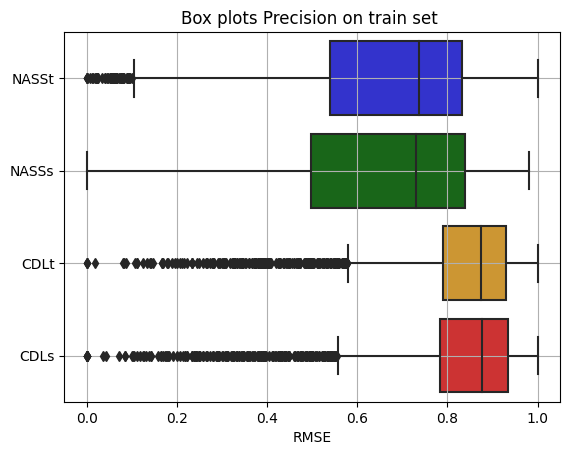

In [107]:
df = pd.DataFrame(list(zip(pNASSt,pNASSs, pCDLt, pCDLs)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots Precision on train set ")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

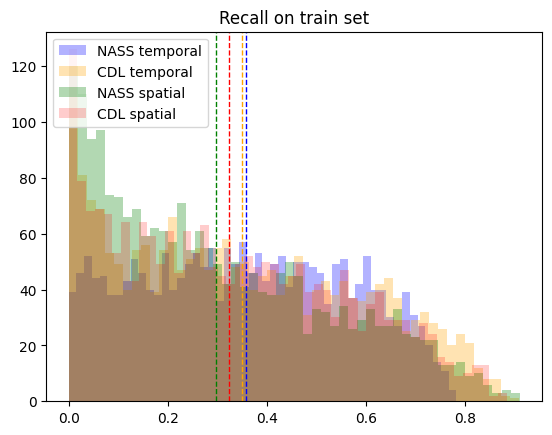

NASS temp mean:    0.35812202303944113 NASS temp std:    0.2051363051334141
NASS spatial mean: 0.2974653820501307 NASS spatial std: 0.2261383949781582
CDL temp mean:     0.348934594584951 CDL temp std:     0.23689152486707427
CDL spatial mean:  0.3242944549793449 CDL spatial std:  0.22614076404379166


In [108]:
plt.hist(rNASSt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rCDLt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rNASSs , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rCDLs, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Recall on train set")
plt.axvline(np.nanmean(rNASSs), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rNASSt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rCDLt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rCDLs), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(rNASSt), "NASS temp std:   ", np.std(rNASSt)) 
print("NASS spatial mean:", np.nanmean(rNASSs ), "NASS spatial std:", np.nanstd(rNASSs)) 
print("CDL temp mean:    ", np.nanmean(rCDLt ), "CDL temp std:    ", np.nanstd(rCDLt)) 
print("CDL spatial mean: ", np.nanmean(rCDLs ), "CDL spatial std: ", np.nanstd(rCDLs)) 

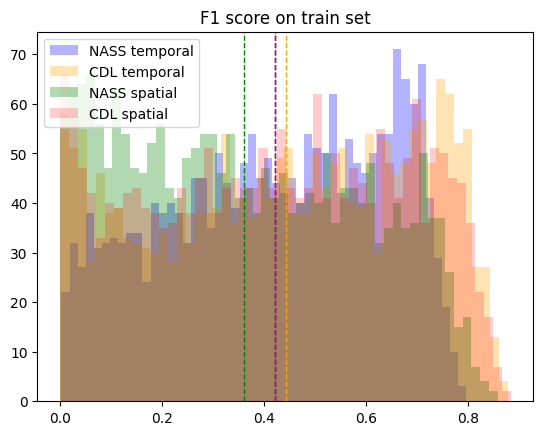

NASS temp mean:    0.4222488512844889 NASS temp std:    0.2102446133872736
NASS spatial mean: 0.36224767109121586 NASS spatial std: 0.23016232985148002
CDL temp mean:     0.4439842259198182 CDL temp std:     0.24748008004543798
CDL spatial mean:  0.421401731678023 CDL spatial std:  0.24204650228268343


In [109]:
plt.hist(f1NASSt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(f1CDLt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(f1NASSs , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(f1CDLs, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("F1 score on train set")
plt.axvline(np.nanmean(f1NASSs), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1NASSt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1CDLt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1CDLs), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(f1NASSt), "NASS temp std:   ", np.std(f1NASSt)) 
print("NASS spatial mean:", np.nanmean(f1NASSs ), "NASS spatial std:", np.nanstd(f1NASSs)) 
print("CDL temp mean:    ", np.nanmean(f1CDLt ), "CDL temp std:    ", np.nanstd(f1CDLt)) 
print("CDL spatial mean: ", np.nanmean(f1CDLs ), "CDL spatial std: ", np.nanstd(f1CDLs)) 

In [67]:
#acurracy_list, precision_list, recall_list, f1_list
aCDLs2, pCDLs2, rCDLs2, f1CDLs2 = mm.f1_score("Predictions/test_set/CDL_spatial", 0.5)
aNASSt2, pNASSt2, rNASSt2, f1NASSt2 = mm.f1_score("Predictions/test_set/NASS_temporal", 0.5)
aCDLt2, pCDLt2, rCDLt2, f1CDLt2 = mm.f1_score("Predictions/test_set/CDL_temporal", 0.5)
aNASSs2, pNASSs2, rNASSs2, f1NASSs2 = mm.f1_score("Predictions/test_set/NASS_spatial", 0.5)

all filles: 512
all filles: 547
all filles: 547
all filles: 512


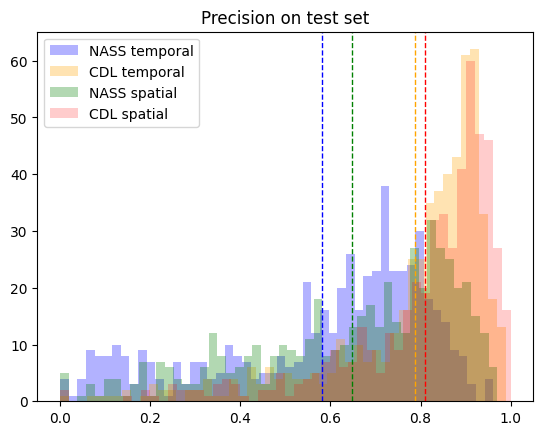

NASS temp mean:    0.5815077248846069 NASS temp std:    0.2367344573450396
NASS spatial mean: 0.6481554303404653 NASS spatial std: 0.2315730852092952
CDL temp mean:     0.7883763088778494 CDL temp std:     0.1796319059970423
CDL spatial mean:  0.8102251360119638 CDL spatial std:  0.17216325543476804


In [68]:
plt.hist(pNASSt2, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(pCDLt2, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(pNASSs2 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(pCDLs2, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Precision on test set")
plt.axvline(np.mean(pNASSs2), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(pNASSt2), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(pCDLt2), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(pCDLs2), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(pNASSt2), "NASS temp std:   ", np.std(pNASSt2)) 
print("NASS spatial mean:", np.mean(pNASSs2 ), "NASS spatial std:", np.std(pNASSs2)) 
print("CDL temp mean:    ", np.nanmean(pCDLt2 ), "CDL temp std:    ", np.nanstd(pCDLt2)) 
print("CDL spatial mean: ", np.nanmean(pCDLs2 ), "CDL spatial std: ", np.nanstd(pCDLs2)) 

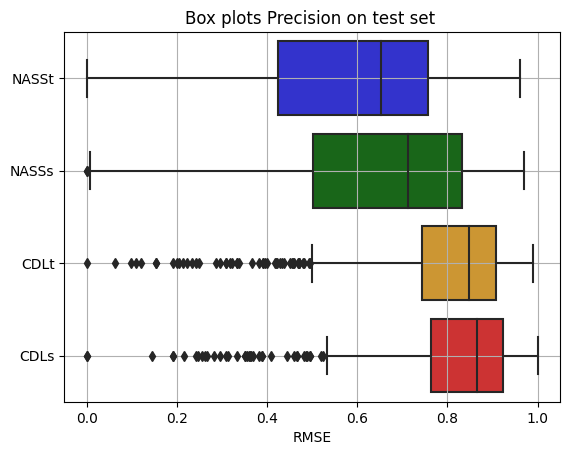

In [110]:
df = pd.DataFrame(list(zip(pNASSt2,pNASSs2, pCDLt2, pCDLs2)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots Precision on test set ")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

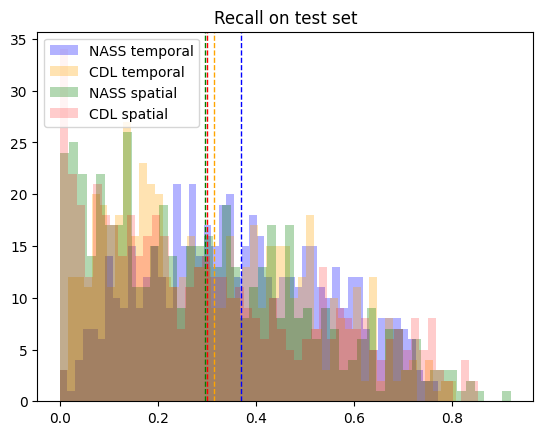

NASS temp mean:    0.3687371272638666 NASS temp std:    0.18089759665513294
NASS spatial mean: 0.29564037708092594 NASS spatial std: 0.21261427087109253
CDL temp mean:     0.3139182073643605 CDL temp std:     0.1926538549158811
CDL spatial mean:  0.30060722267458795 CDL spatial std:  0.22903836120976623


In [112]:
plt.hist(rNASSt2, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rCDLt2, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rNASSs2 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rCDLs2, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Recall on test set")
plt.axvline(np.nanmean(rNASSs2), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rNASSt2), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rCDLt2), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rCDLs2), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.nanmean(rNASSt2), "NASS temp std:   ", np.nanstd(rNASSt2)) 
print("NASS spatial mean:", np.nanmean(rNASSs2 ), "NASS spatial std:", np.nanstd(rNASSs2)) 
print("CDL temp mean:    ", np.nanmean(rCDLt2 ), "CDL temp std:    ", np.nanstd(rCDLt2)) 
print("CDL spatial mean: ", np.nanmean(rCDLs2 ), "CDL spatial std: ", np.nanstd(rCDLs2)) 

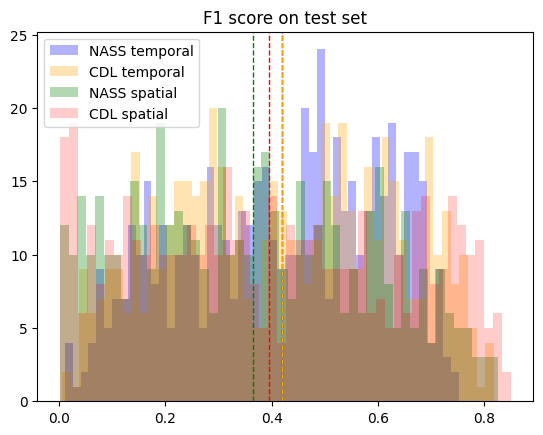

NASS temp mean:    0.4188450408443397 NASS temp std:    0.1862466959389042
NASS spatial mean: 0.3650887254930159 NASS spatial std: 0.21593845909628398
CDL temp mean:     0.4199723056321911 CDL temp std:     0.2065367064094839
CDL spatial mean:  0.3958017172822334 CDL spatial std:  0.24391483731056526


In [113]:
plt.hist(f1NASSt2, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(f1CDLt2, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(f1NASSs2 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(f1CDLs2, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("F1 score on test set")
plt.axvline(np.nanmean(f1NASSs2), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1NASSt2), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1CDLt2), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1CDLs2), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.nanmean(f1NASSt2), "NASS temp std:   ", np.nanstd(f1NASSt2)) 
print("NASS spatial mean:", np.nanmean(f1NASSs2 ), "NASS spatial std:", np.nanstd(f1NASSs2)) 
print("CDL temp mean:    ", np.nanmean(f1CDLt2 ), "CDL temp std:    ", np.nanstd(f1CDLt2)) 
print("CDL spatial mean: ", np.nanmean(f1CDLs2 ), "CDL spatial std: ", np.nanstd(f1CDLs2)) 

# Transfer learning!
# NASS target acurracy on test set


In [12]:

#test set files north
Bt = read_lits('lists_data/BN_temp_0.txt', 'lists_data/BN_temp_1.txt', 'lists_data/BN_temp_2.txt')
B_temporal = Bt[0]
Bs = read_lits('lists_data/BN_s_0.txt', 'lists_data/BN_s_1.txt', 'lists_data/BN_s_2.txt')
B_spatial = Bs[0]

In [13]:
MSE_nt_CDLs = mm.mse_eval_NASS_North("Predictions/Test_set_north/CDL_spatial" , Bs)
MSE_nt_CDLt = mm.mse_eval_NASS_North("Predictions/Test_set_north/CDL_temporal" , Bt)
MSE_nt_NASSs = mm.mse_eval_NASS_North("Predictions/Test_set_north/NASS_spatial" , Bs)
MSE_nt_NASSt = mm.mse_eval_NASS_North("Predictions/Test_set_north/NASS_temporal" , Bt)

all filles: 321
all filles: 299
all filles: 321
all filles: 299


In [14]:
rmse_CDLs_nt = mm.rmse_in(MSE_nt_CDLs)
rmse_NASSs_nt = mm.rmse_in(MSE_nt_NASSs)
rmse_CDLt_nt = mm.rmse_in(MSE_nt_CDLt)
rmse_NASSt_nt = mm.rmse_in(MSE_nt_NASSt)

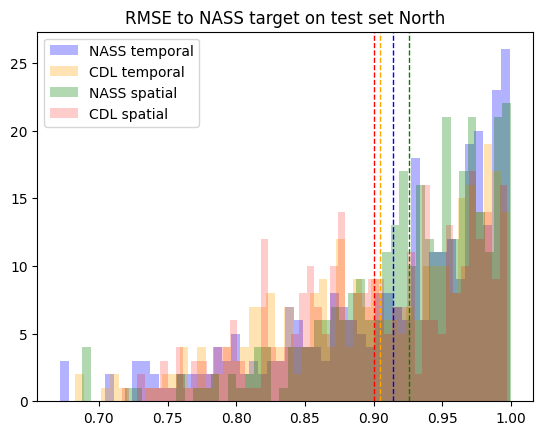

NASS temp mean:    0.9141044669593723 NASS temp std:    0.07640750577732976
NASS spatial mean: 0.9257478812834176 NASS spatial std: 0.06115654419200693
CDL temp mean:     0.9043886099743583 CDL temp std:     0.07439591588905313
CDL spatial mean:  0.9002298541420902 CDL spatial std:  0.06908312543274789


In [21]:
plt.hist(rmse_NASSt_nt, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rmse_CDLt_nt, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rmse_NASSs_nt , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rmse_CDLs_nt, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("RMSE to NASS target on test set North")
plt.axvline(np.mean(rmse_NASSs_nt), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_NASSt_nt), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLt_nt), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLs_nt), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(rmse_NASSt_nt), "NASS temp std:   ", np.std(rmse_NASSt_nt)) 
print("NASS spatial mean:", np.mean(rmse_NASSs_nt ), "NASS spatial std:", np.std(rmse_NASSs_nt)) 
print("CDL temp mean:    ", np.mean(rmse_CDLt_nt ), "CDL temp std:    ", np.std(rmse_CDLt_nt)) 
print("CDL spatial mean: ", np.mean(rmse_CDLs_nt ), "CDL spatial std: ", np.std(rmse_CDLs_nt)) 

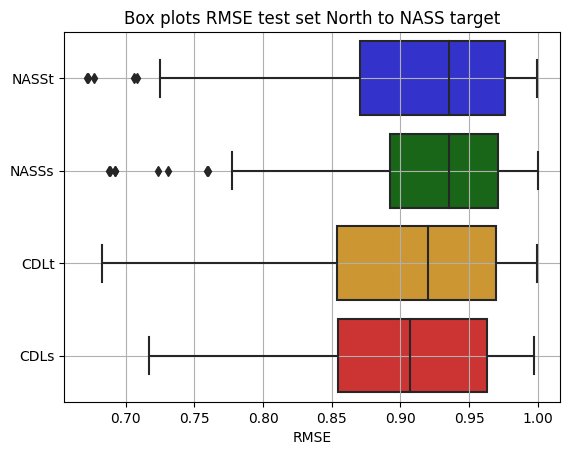

In [22]:
df = pd.DataFrame(list(zip(rmse_NASSt_nt,rmse_NASSs_nt, rmse_CDLt_nt, rmse_CDLs_nt)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots RMSE test set North to NASS target")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

# Comparation to CDL target

In [17]:
mse_CDLs_test = mm.mse_eval_CDL_North("Predictions/Test_set_north/CDL_spatial")
mse_NASSs_test = mm.mse_eval_CDL_North("Predictions/Test_set_north/NASS_spatial")
mse_CDLt_test = mm.mse_eval_CDL_North("Predictions/Test_set_north/CDL_temporal")
mse_NASSt_test = mm.mse_eval_CDL_North("Predictions/Test_set_north/NASS_temporal")

all filles: 321
all filles: 321
all filles: 299
all filles: 299


In [18]:
rmse_CDLs_test = mm.rmse(mse_CDLs_test)
rmse_NASSs_test = mm.rmse(mse_NASSs_test)
rmse_CDLt_test = mm.rmse(mse_CDLt_test)
rmse_NASSt_test = mm.rmse(mse_NASSt_test)

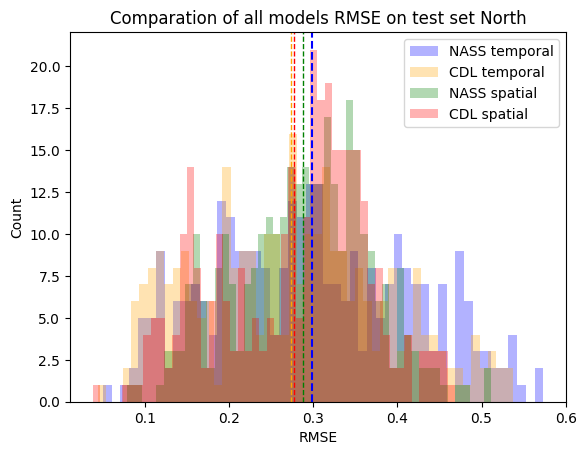

NASS temp mean:    0.2987648973264415 NASS temp std:    0.11818930840335935
NASS spatial mean: 0.2882732032222072 NASS spatial std: 0.08001553406161341
CDL temp mean:     0.2733422795929814 CDL temp std:     0.11270559632001392
CDL spatial mean:  0.27763454022309436 CDL spatial std:  0.08860135812339949


In [23]:
plt.hist(rmse_NASSt_test, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rmse_CDLt_test, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rmse_NASSs_test , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rmse_CDLs_test, bins=50, alpha= 0.3, color='r', label="CDL spatial")
plt.title("Comparation of all models RMSE on test set North")
plt.axvline(np.mean(rmse_NASSs_test), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_NASSt_test), color='b', linestyle='dashed', linewidth=1.5)
plt.axvline(np.mean(rmse_CDLt_test), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(rmse_CDLs_test), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.xlabel("RMSE")
plt.ylabel("Count")
plt.show()
print("NASS temp mean:   ", np.mean(rmse_NASSt_test), "NASS temp std:   ", np.std(rmse_NASSt_test)) 
print("NASS spatial mean:", np.mean(rmse_NASSs_test ), "NASS spatial std:", np.std(rmse_NASSs_test)) 
print("CDL temp mean:    ", np.mean(rmse_CDLt_test ), "CDL temp std:    ", np.std(rmse_CDLt_test)) 
print("CDL spatial mean: ", np.mean(rmse_CDLs_test ), "CDL spatial std: ", np.std(rmse_CDLs_test)) 

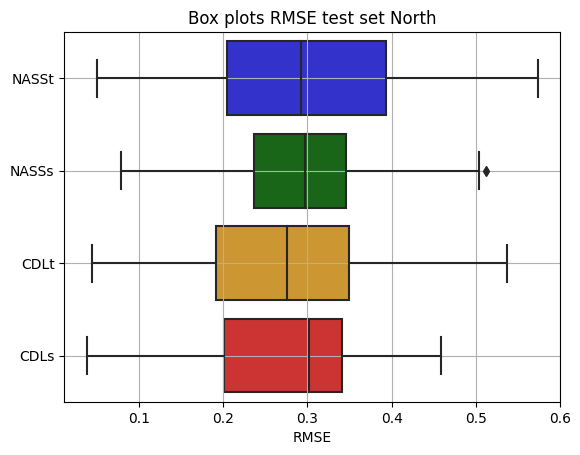

In [20]:
df = pd.DataFrame(list(zip(rmse_NASSt_test,rmse_NASSs_test, rmse_CDLt_test, rmse_CDLs_test)), 
                  columns=["NASSt", "NASSs", "CDLt", "CDLs"])
#sns.set(style="ticks")
my_pal = {"NASSt": "b", "NASSs": "g", "CDLt": "orange", "CDLs": "r"}
sns.boxplot(data=df, palette=my_pal, orient="h", saturation=0.6)
plt.title("Box plots RMSE test set North")
plt.xlabel("RMSE")
plt.grid()  
plt.show()

In [25]:
#acurracy_list, precision_list, recall_list, f1_list
aCDLs3, pCDLs3, rCDLs3, f1CDLs3 = mm.f1_score_North("Predictions/Test_set_north/CDL_spatial", 0.5)
aNASSt3, pNASSt3, rNASSt3, f1NASSt3 = mm.f1_score_North("Predictions/Test_set_north/NASS_temporal", 0.5)
aCDLt3, pCDLt3, rCDLt3, f1CDLt3 = mm.f1_score_North("Predictions/Test_set_north/CDL_temporal", 0.5)
aNASSs3, pNASSs3, rNASSs3, f1NASSs3 = mm.f1_score_North("Predictions/Test_set_north/NASS_spatial", 0.5)

all filles: 321


pyLib\modis_lib\metrics_models.py:349: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp/(tp+fp)


all filles: 299
all filles: 299
all filles: 321


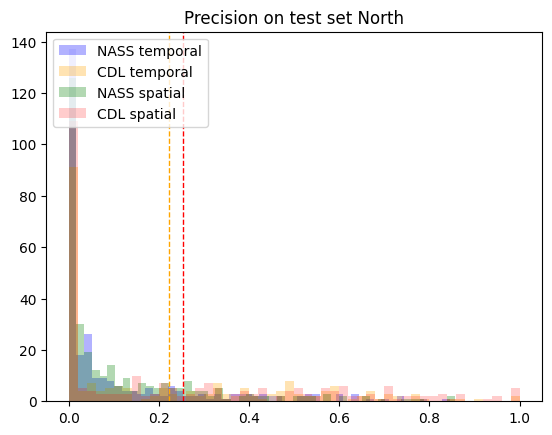

NASS temp mean:    0.11481068131097409 NASS temp std:    0.18106902773327235
NASS spatial mean: 0.11924229186585576 NASS spatial std: 0.1733576879223527
CDL temp mean:     0.2224010901958539 CDL temp std:     0.26359184643117156
CDL spatial mean:  0.2529647965225113 CDL spatial std:  0.29324906046631993


In [29]:
plt.hist(pNASSt3, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(pCDLt3, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(pNASSs3 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(pCDLs3, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Precision on test set North")
plt.axvline(np.mean(pNASSs3), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(pNASSt3), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(pCDLt3), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(pCDLs3), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.nanmean(pNASSt3), "NASS temp std:   ", np.nanstd(pNASSt3)) 
print("NASS spatial mean:", np.nanmean(pNASSs3 ), "NASS spatial std:", np.nanstd(pNASSs3)) 
print("CDL temp mean:    ", np.nanmean(pCDLt3 ), "CDL temp std:    ", np.nanstd(pCDLt3)) 
print("CDL spatial mean: ", np.nanmean(pCDLs3 ), "CDL spatial std: ", np.nanstd(pCDLs3)) 

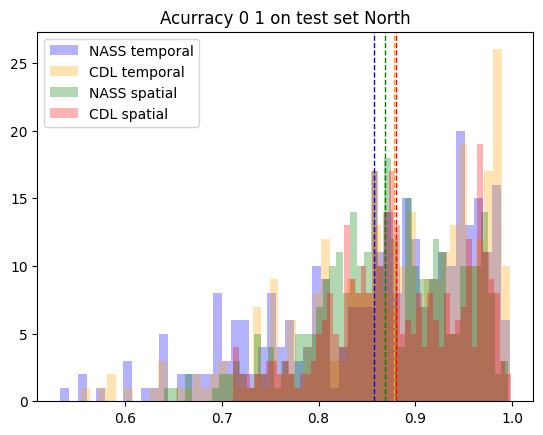

NASS temp mean:    0.8571580368973937 NASS temp std:    0.10437324699634877
NASS spatial mean: 0.8682290483353289 NASS spatial std: 0.07216075628693983
CDL temp mean:     0.8774163376100352 CDL temp std:     0.09533216537314017
CDL spatial mean:  0.8802427940457331 CDL spatial std:  0.06845342071910585


In [27]:
plt.hist(aNASSt3, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(aCDLt3, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(aNASSs3 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(aCDLs3, bins=50, alpha= 0.3, color='r', label="CDL spatial")
plt.title("Acurracy 0 1 on test set North")
plt.axvline(np.mean(aNASSs3), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aNASSt3), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aCDLt3), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(aCDLs3), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.mean(aNASSt3), "NASS temp std:   ", np.std(aNASSt3)) 
print("NASS spatial mean:", np.mean(aNASSs3 ), "NASS spatial std:", np.std(aNASSs3)) 
print("CDL temp mean:    ", np.mean(aCDLt3 ), "CDL temp std:    ", np.std(aCDLt3)) 
print("CDL spatial mean: ", np.mean(aCDLs3 ), "CDL spatial std: ", np.std(aCDLs3)) 

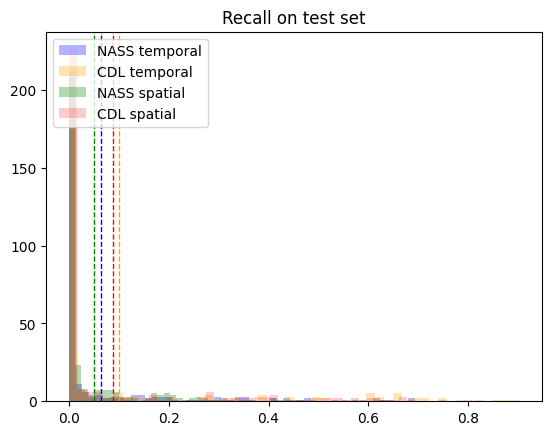

NASS temp mean:    0.0646007390701637 NASS temp std:    0.14117702768144827
NASS spatial mean: 0.05149133841165469 NASS spatial std: 0.1047512494475726
CDL temp mean:     0.10018271091295164 CDL temp std:     0.2132603266267644
CDL spatial mean:  0.0893140459192584 CDL spatial std:  0.17866603932414835


In [28]:
plt.hist(rNASSt3, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(rCDLt3, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(rNASSs3 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(rCDLs3, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("Recall on test set")
plt.axvline(np.nanmean(rNASSs3), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rNASSt3), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rCDLt3), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(rCDLs3), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.nanmean(rNASSt3), "NASS temp std:   ", np.nanstd(rNASSt3)) 
print("NASS spatial mean:", np.nanmean(rNASSs3 ), "NASS spatial std:", np.nanstd(rNASSs3)) 
print("CDL temp mean:    ", np.nanmean(rCDLt3 ), "CDL temp std:    ", np.nanstd(rCDLt3)) 
print("CDL spatial mean: ", np.nanmean(rCDLs3 ), "CDL spatial std: ", np.nanstd(rCDLs3)) 

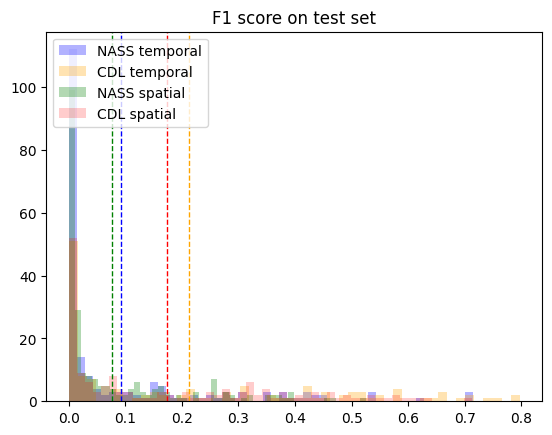

NASS temp mean:    0.09321528117368098 NASS temp std:    0.15686106547834222
NASS spatial mean: 0.07599009788793133 NASS spatial std: 0.1125910747204459
CDL temp mean:     0.21221636972161317 CDL temp std:     0.24224433978480356
CDL spatial mean:  0.17384052527229288 CDL spatial std:  0.19254020836833952


In [30]:
plt.hist(f1NASSt3, bins=50, alpha= 0.3, color='b', label="NASS temporal")
plt.hist(f1CDLt3, bins=50, alpha= 0.3, color='orange', label="CDL temporal" )
plt.hist(f1NASSs3 , bins=50, alpha= 0.3, color='g', label="NASS spatial")
plt.hist(f1CDLs3, bins=50, alpha= 0.2, color='r', label="CDL spatial")
plt.title("F1 score on test set")
plt.axvline(np.nanmean(f1NASSs3), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1NASSt3), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1CDLt3), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(f1CDLs3), color='r', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.show()
print("NASS temp mean:   ", np.nanmean(f1NASSt3), "NASS temp std:   ", np.nanstd(f1NASSt3)) 
print("NASS spatial mean:", np.nanmean(f1NASSs3 ), "NASS spatial std:", np.nanstd(f1NASSs3)) 
print("CDL temp mean:    ", np.nanmean(f1CDLt3 ), "CDL temp std:    ", np.nanstd(f1CDLt3)) 
print("CDL spatial mean: ", np.nanmean(f1CDLs3 ), "CDL spatial std: ", np.nanstd(f1CDLs3)) 

In [ ]:
list_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
act_CDLt = mm.Acurracy_thresholds("Predictions/Train_set/CDL_temporal", list_thresholds)
act_NASSt = m.Acurracy_thresholds("Predictions/Train_set/NASS_temporal", list_thresholds)
act_CDLs = mm.Acurracy_thresholds("Predictions/Train_set/CDL_spatial", list_thresholds)
act_NASSs = mm.Acurracy_thresholds("Predictions/Train_set/NASS_spatial", list_thresholds)

In [11]:
def read_lits(l0,l1,l2):
    """recives 3 files with lists
    return a triple list with the lists"""
    
    # empty list to read list from a file
    b0 = []
    b1 = []
    b2 = []
    # open file and read the content in a list
    with open(l0, 'r') as fp:
        for line in fp:
            # remove linebreak from a current name
            # linebreak is the last character of each line
            x = line[:-1]
            # add current item to the list
            b0.append(x)

    with open(l1, 'r') as fp:
        for line in fp:
            x = line[:-1]
            b1.append(x)

    with open(l2, 'r') as fp:
        for line in fp:
            x = line[:-1]
            b2.append(float(x))
    B2 = [b0, b1, b2]
    return B2